# KNN, Gaussian Naive Bayes and Data Analysis (with Tableau)

## Online News Popularity dataset

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.naive_bayes import GaussianNB, MultinomialNB
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv('./OnlineNewsPopularity/OnlineNewsPopularity.csv', header = 0)


## Data preprocessing

In [3]:
for i in range(len(data.columns)):
    data.columns.values[i] = data.columns.values[i].replace(" ", "")
    
X = data.iloc[:, 2:-1]
y = data.iloc[:, -1]

X_train, X_test, y_train_old, y_test_old = train_test_split(X, y, test_size=0.2, random_state=21)
X_train.reset_index(drop = True, inplace = True)
X_test.reset_index(drop = True, inplace = True)
y_train_old.reset_index(drop = True, inplace = True)
y_test_old.reset_index(drop = True, inplace = True)

### Binary Classification

Our target variable `shares` is a numeric quantity, since we are working with a classification problem, we encode our target variable as a boolean - popular or non-popular. For that we find the median of the shares and use that to classify our training data. 


In [6]:
shares_median = np.median(y_train_old)
shares_median

1400.0

In [7]:
y_train = y_train_old.copy()
y_test = y_test_old.copy()

for i in range(y_train_old.shape[0]):
    if y_train_old[i] < shares_median:
        y_train[i] = 0
    else:
        y_train[i] = 1
      
for i in range(y_test_old.shape[0]):
    if y_test_old[i] < shares_median:
        y_test[i] = 0
    else:
        y_test[i] = 1

## K-Nearest Neighbor

Using sklearn's KNeighborsClassifier we are going to find the accuracy for different values of k and then select k with max accuracy. 

In [8]:
neighbors = [11, 15, 21, 25, 31, 35, 51, 63, 65, 69, 71, 75, 101, 151, 201, 251]
cv_scores = []

for k in neighbors:
    print('running for k = ', k)
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    print('--> mean score : ', scores.mean())
    cv_scores.append(scores.mean())

running for k =  11
--> mean score :  0.5798203732358547
running for k =  15
--> mean score :  0.582090960282796
running for k =  21
--> mean score :  0.5820282466059256
running for k =  25
--> mean score :  0.5837937738084301
running for k =  31
--> mean score :  0.5890909121638684
running for k =  35
--> mean score :  0.5897530644002253
running for k =  51
--> mean score :  0.5929693076799797
running for k =  63
--> mean score :  0.5939148545515932
running for k =  65
--> mean score :  0.5935048494732568
running for k =  69
--> mean score :  0.5938832491649775
running for k =  71
--> mean score :  0.5931896207870587
running for k =  75
--> mean score :  0.5920543024087699
running for k =  101
--> mean score :  0.5874511205148487
running for k =  151
--> mean score :  0.5886811158660035
running for k =  201
--> mean score :  0.5860953796682816
running for k =  251
--> mean score :  0.5822806323701991


The optimal number of neighbors is 63


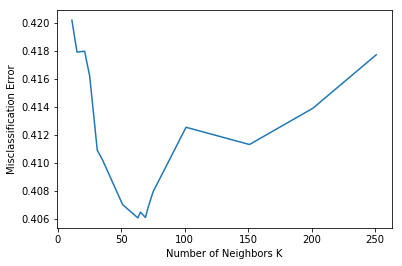

In [9]:
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

## Gaussian Naive Bayes

In [39]:
clf_gnb = GaussianNB().fit(X_train, y_train)
clf_gnb.predict(X_test)
clf_gnb.score(X_test, y_test)

0.5056123092445454